### Road Accident Prediction and Classification


#### I- Introduction
There are some questions that can be answered using this data such as -

-  What are the regions or areas with most frequent accidents?
- What kind of street or highways are more liekly to have accidents?
- What are the age group are most likely to be involved in accidents?
- What are the areas with higher accident severity or lower accident severity?
There are endless questions that can be answered with this dataset. We will be answering few of the questions as I mentioned above. We will also figure out some way to implement the machine learning on this dataset and see what we can come up with.

#### II- Importing Data and cleaning
We import three files to perform analysis on this data. This data is consist of three files that are accidents, casualities and vehicles. However, we have one more file which is general information about the traffic count for year 2000 to 2015. We can use general traffic information data for machine learning part.

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [2]:
accidents = pd.read_csv("/workspaces/ML-ZoomCamp2024-Homework/7-Midterm-Project/Accidents.csv", index_col='Accident_Index')
vehicles = pd.read_csv("/workspaces/ML-ZoomCamp2024-Homework/7-Midterm-Project/Vehicles.csv",index_col='Accident_Index')
casualities = pd.read_csv("/workspaces/ML-ZoomCamp2024-Homework/7-Midterm-Project/Casualties.csv", index_col='Accident_Index')
print('Loaded')

Loaded


In [3]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 2100
(100, 21)


,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [4]:
print("casualties")
print("size=",casualities.size)
print(casualities.shape)
casualities.head()

casualties
size= 1386
(99, 14)


,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [5]:
accidents = accidents.join(vehicles, how='outer')
print("done joining")
print(accidents.shape)

done joining
(141, 52)


Identify missing values

In [6]:
#combining two columns
accidents['Date_time'] = accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualities.columns:
    casualities = (casualities[casualities[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Our dataset is clean to do some analysis. We would be using very few columns to do analysis since the dataset is fairly large.


Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

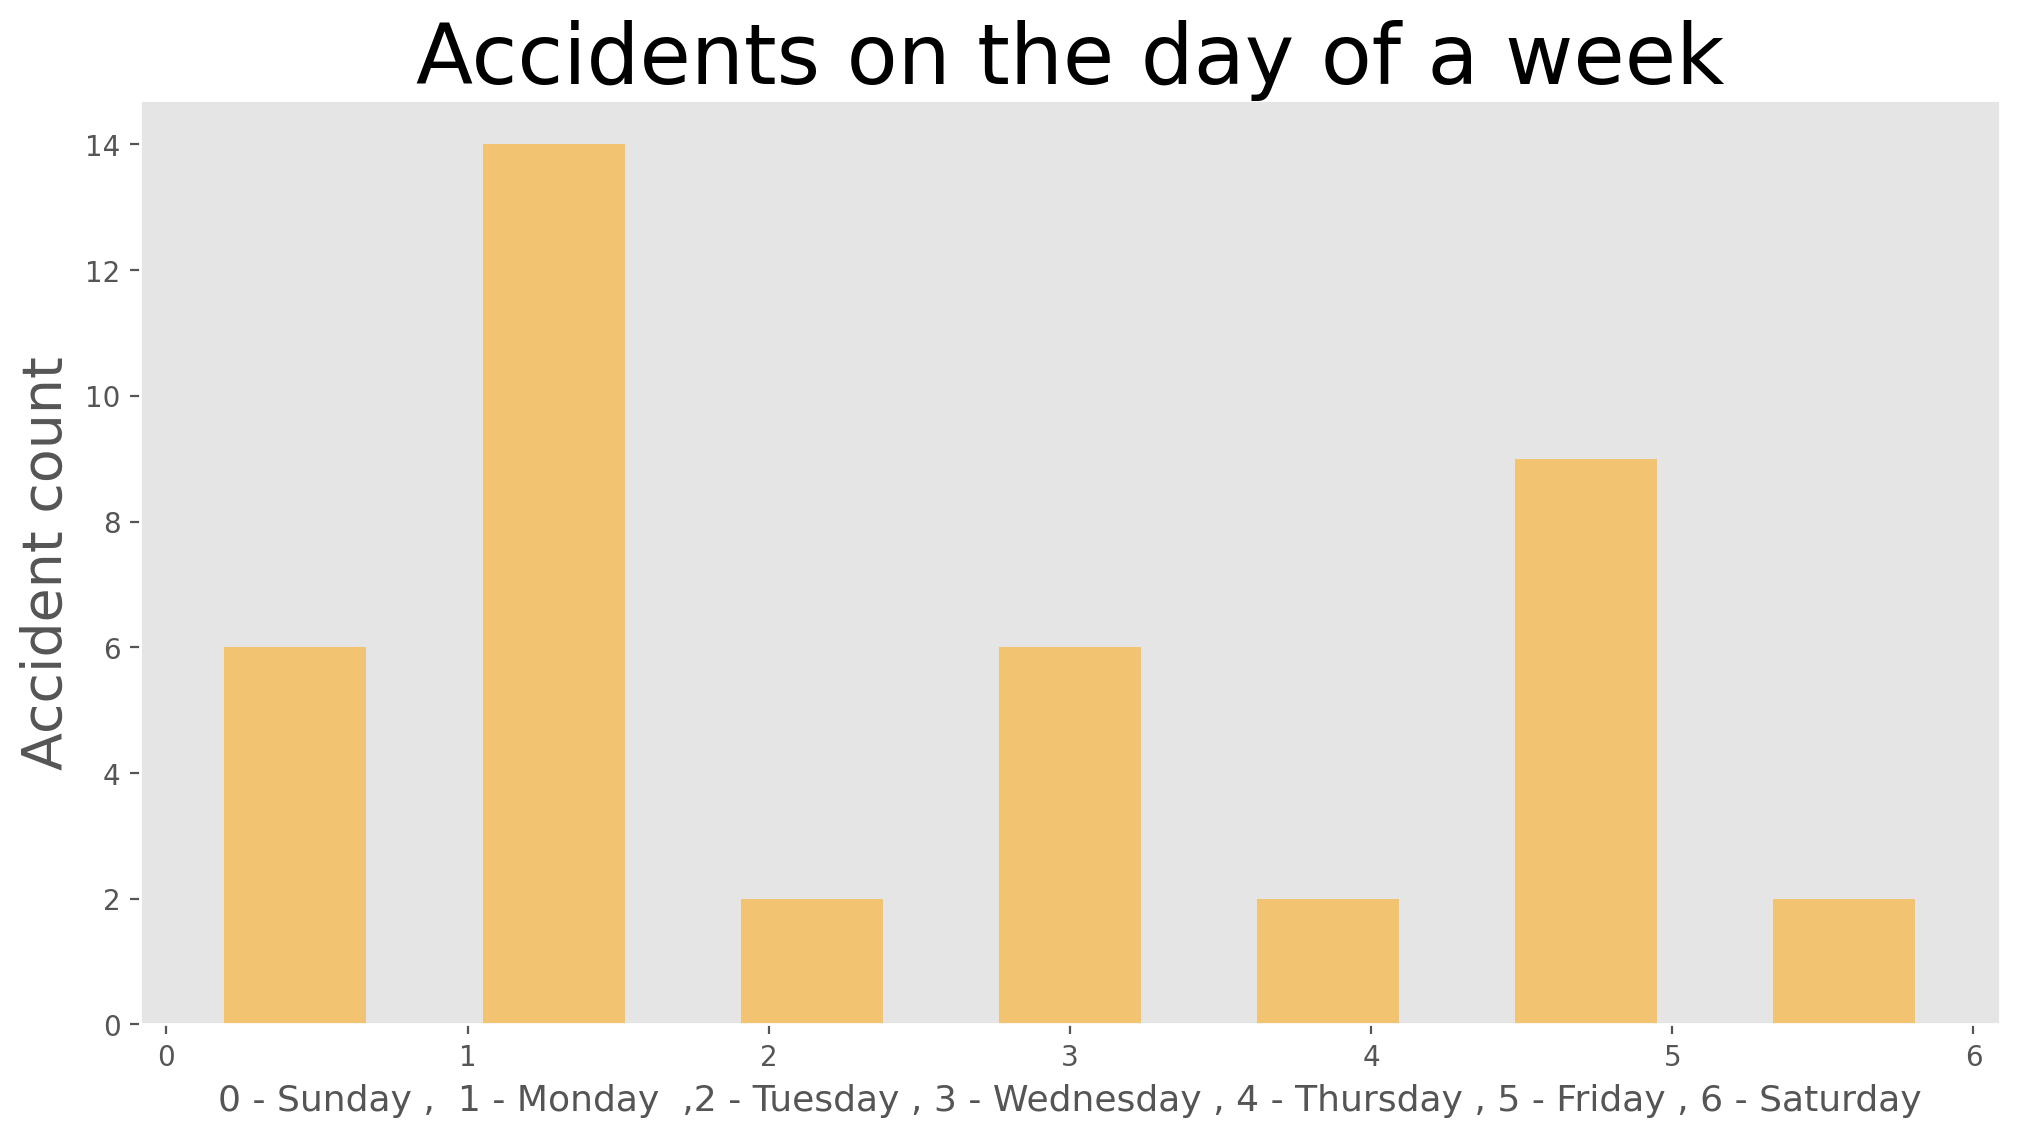

In [7]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.

Text(0, 0.5, 'Accident count')

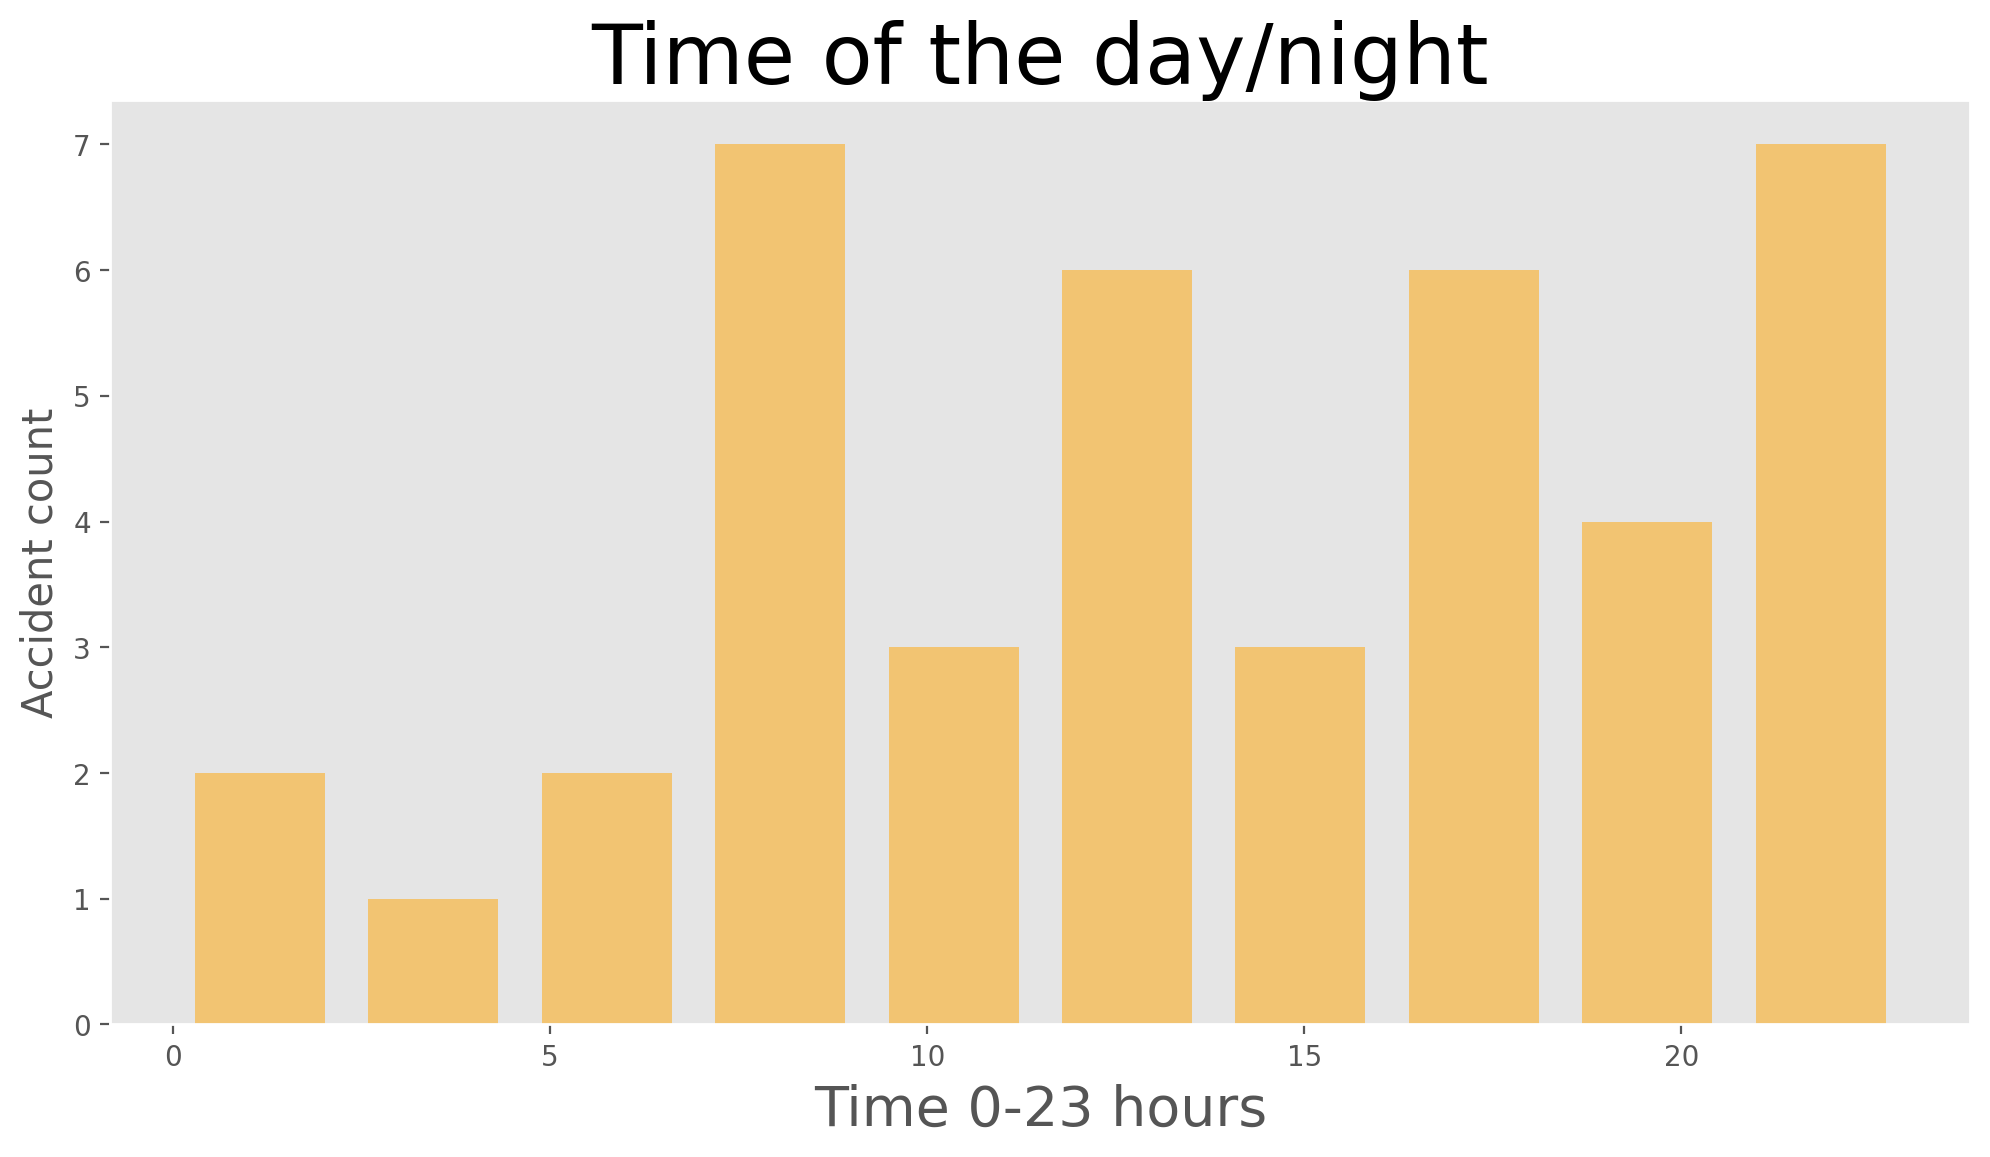

In [8]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.



### Age band of casualities
In this dataset, age band is grouped in 11 different codes. We will create the labels and pass it to the plot as xticks so we can have idea about the bins representation.

Text(0.5, 0, 'Age of Drivers')

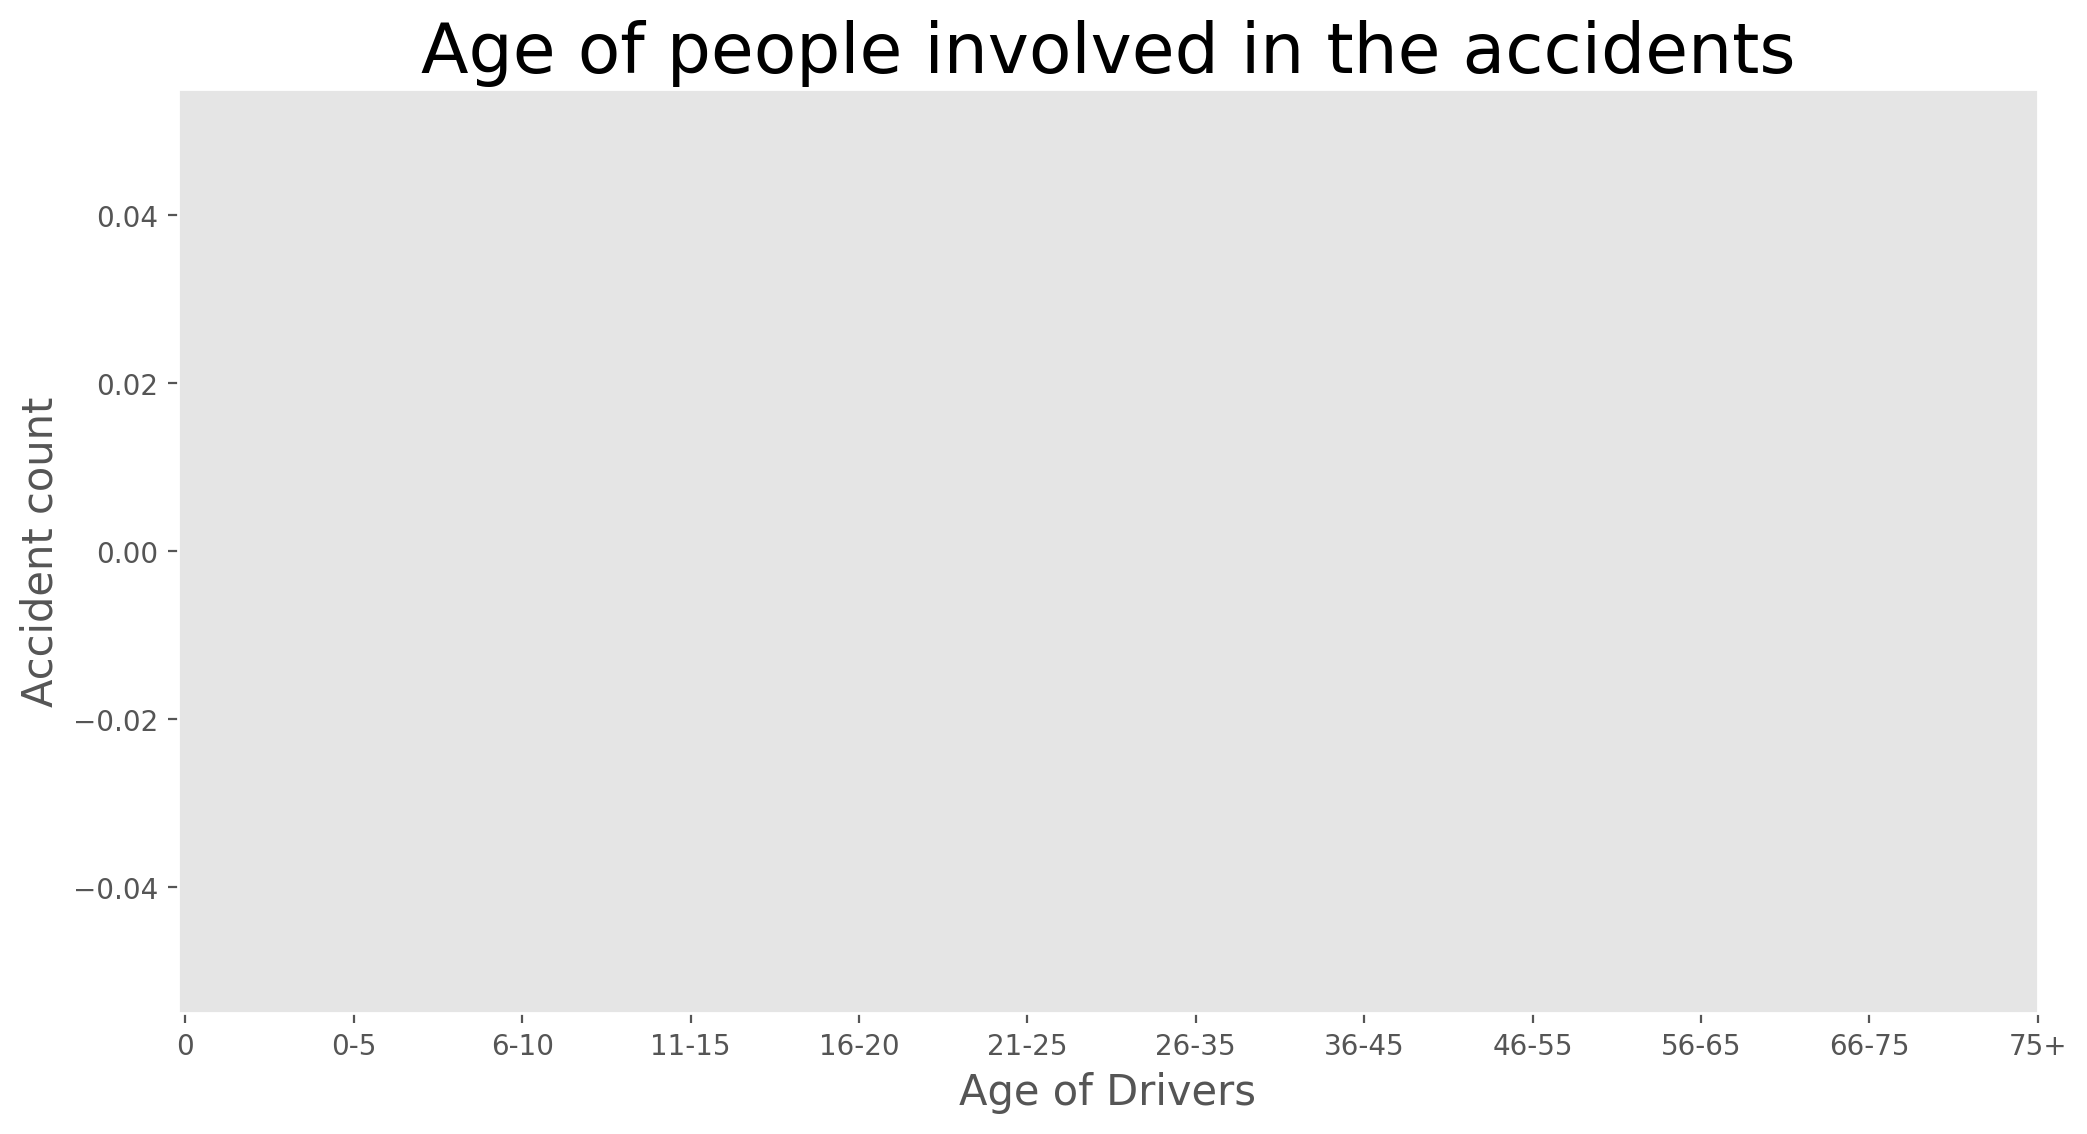

In [9]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
           '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualities.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'black',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

This is very interesting fact about this dataset. Most of the drivers age is around 225 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age.

#### Model Selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


##### Normalize the Data
There are few columns that we will standarize, so it would not effect negatively on our machine learning algorithms. Age of driver is from 18 to 88 in the dataset and we can normalize it. Also, the age of vehicle is also from 0 to 100 and it can skew the performance of your machine learning algorithm and we will normalize this predictor too.

done


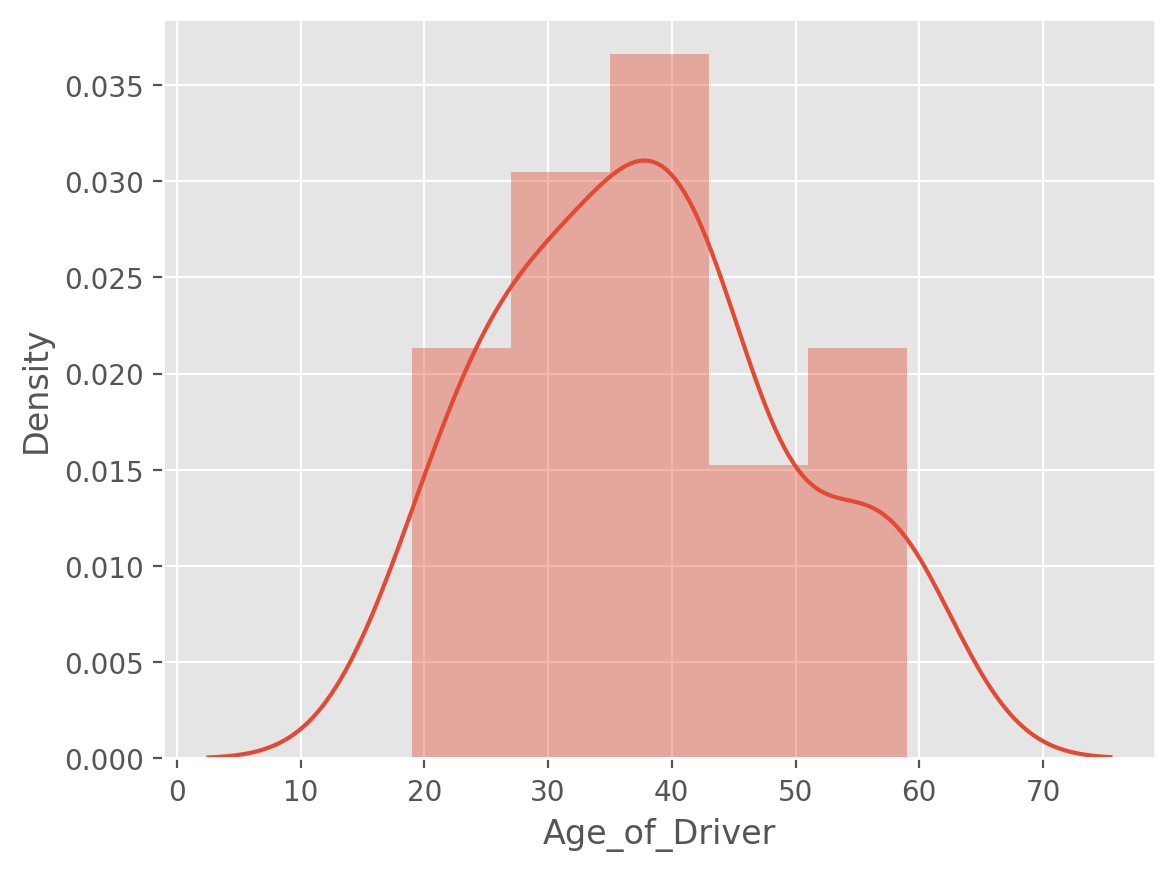

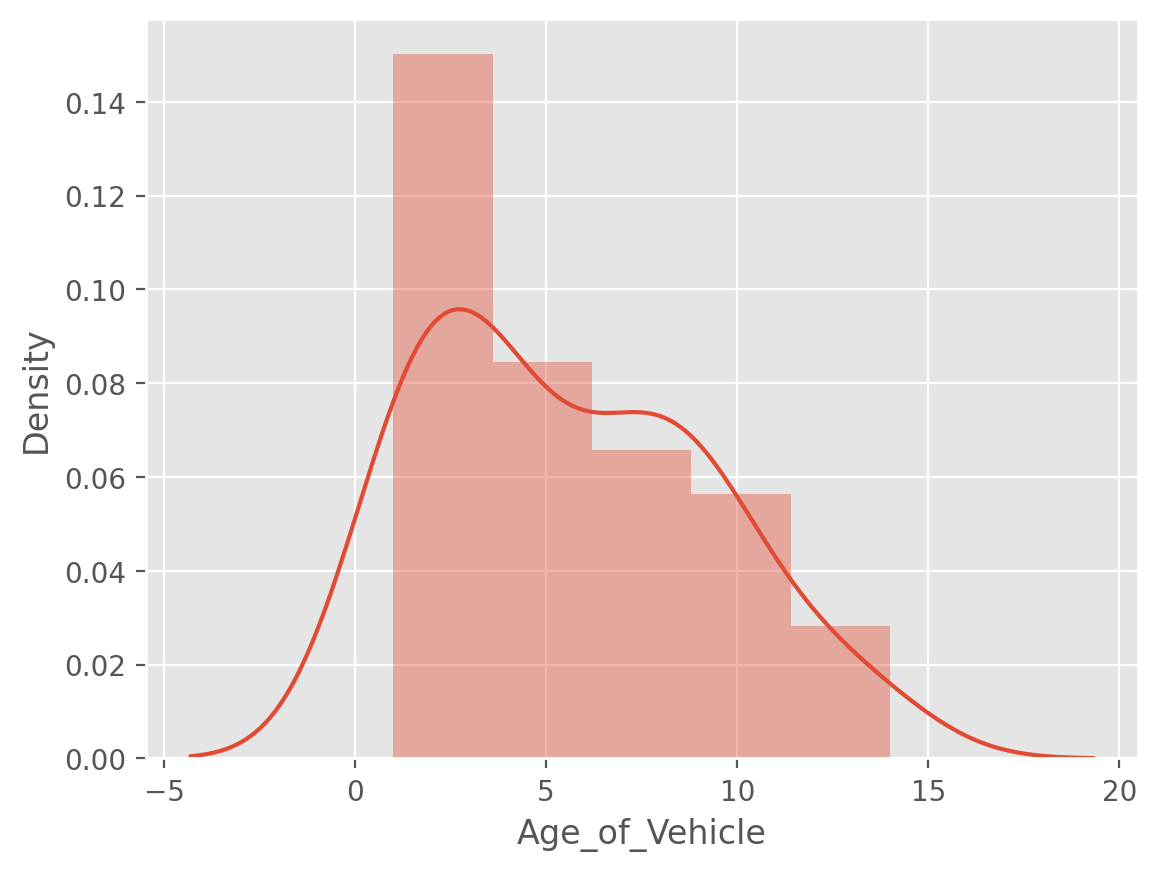

<Figure size 640x480 with 0 Axes>

In [12]:
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()
print("done")


In [13]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
# sns.distplot(accidents['Age_of_Driver']);
# fig = plt.figure()
# sns.distplot(accidents['Age_of_Vehicle']);
# fig = plt.figure()
print("done")

done


In [14]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Date_time
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00007,524220,180830,-0.211277,51.512695,1,3,2,1,5,12,...,15.0,1.0,3.713572,7.0,4266.0,1.0,1.386294,6.0,1.0,2005-01-13 20:40:00
200501BS00010,527350,177650,-0.167342,51.483420,1,3,2,2,7,12,...,15.0,1.0,3.555348,6.0,1998.0,1.0,2.564949,3.0,1.0,2005-01-15 22:43:00
200501BS00011,524550,180810,-0.206531,51.512443,1,3,2,5,7,12,...,1.0,1.0,3.737670,7.0,8268.0,2.0,0.693147,2.0,1.0,2005-01-15 16:00:00
200501BS00012,526240,178900,-0.182872,51.494902,1,3,1,1,1,12,...,15.0,1.0,3.526361,6.0,1988.0,1.0,1.791759,4.0,1.0,2005-01-16 00:42:00
200501BS00014,526170,177690,-0.184312,51.484044,1,3,2,1,3,12,...,15.0,2.0,2.944439,4.0,1124.0,1.0,2.079442,8.0,1.0,2005-01-25 20:48:00


##### Spliting the data into training data and test data
We will also consider few features as predictors for machine learning algorithm.

In [15]:
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [19]:
X_train.shape


(32, 11)

In [21]:
X_train[0]

array([1.00000000e+00, 3.82864140e+00, 9.00000000e+00, 2.19722458e+00,
       1.98500000e+03, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+01])

#### Random Forest

In [22]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9

done


In [23]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9

done


In [24]:

print(accident_ml.head())
print(X_train.shape)
print(X_train[0])
print("done")

                Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  \
Accident_Index                                                               
200501BS00007                                             1       3.713572   
200501BS00010                                             1       3.555348   
200501BS00011                                             1       3.737670   
200501BS00012                                             1       3.526361   
200501BS00014                                             1       2.944439   

                Vehicle_Type  Age_of_Vehicle  Engine_Capacity_(CC)  \
Accident_Index                                                       
200501BS00007            9.0        1.386294                4266.0   
200501BS00010            9.0        2.564949                1998.0   
200501BS00011           11.0        0.693147                8268.0   
200501BS00012            9.0        1.791759                1988.0   
200501BS00014            9.0     

In [29]:
Y_pred = random_forest.predict(X_test[7].reshape(1, -1))
print(Y_pred)

[3]


##### Logistic Regression


In [30]:

lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


##### Decision Trees

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(     
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 88.89
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         0
           3   1.000000  0.888889  0.941176         9

    accuracy                       0.888889         9
   macro avg   0.500000  0.444444  0.470588         9
weighted avg   1.000000  0.888889  0.941176         9



Predicted,2,3,All
Actual,,,
3,1,8,9
All,1,8,9


As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.

##### Hyperparameters tuning for the models
Logistic Regression with Hyperparameter tuning


In [32]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


Feature importance


<Axes: >

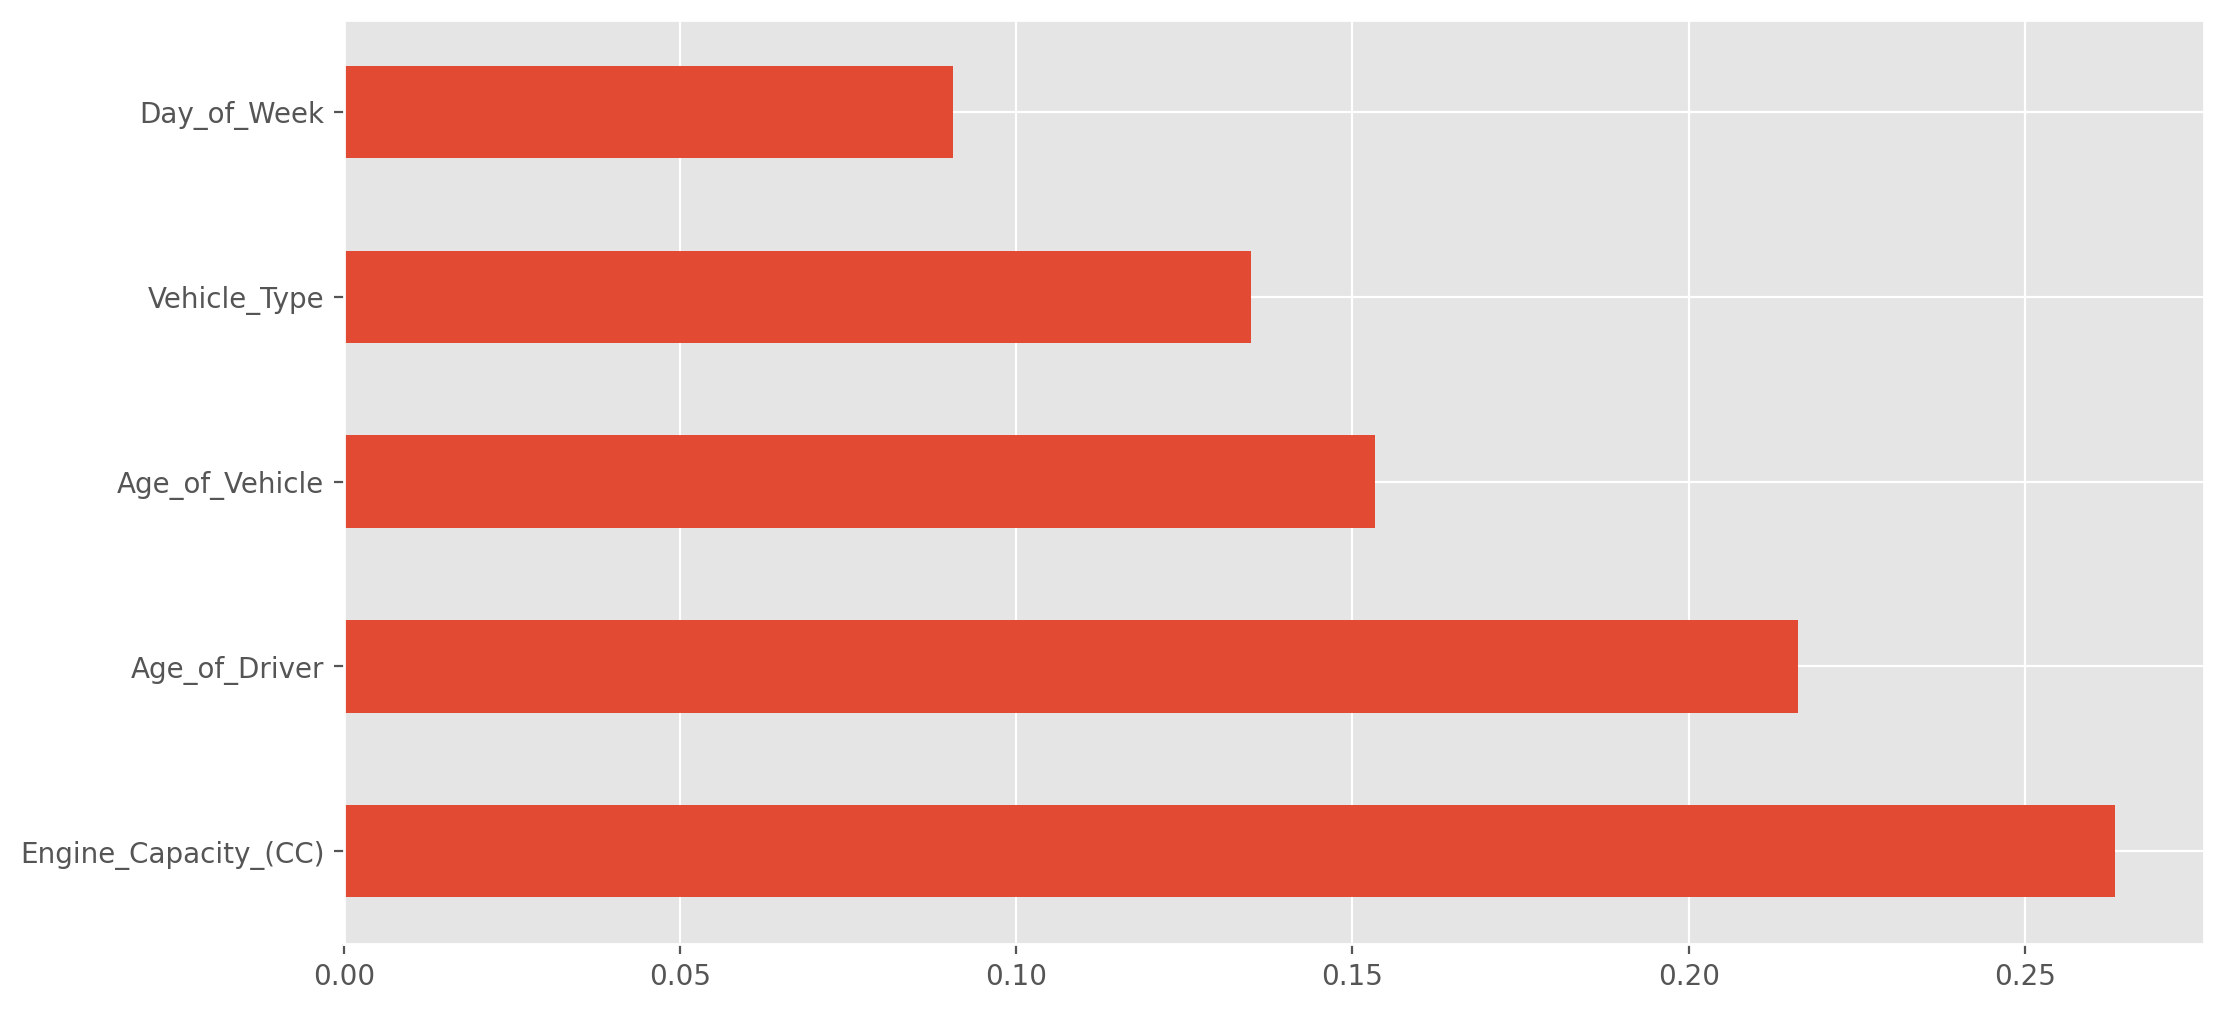

In [33]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [37]:
#Y_pred = grid_search.predict(X_test)
#acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

#sk_report = classification_report(
#     digits=6,
#     y_true=y_test, 
#     y_pred=Y_pred)
#print("Accuracy" , acc_random_forest1)
#print(sk_report)
#pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Random forest took lots of time to tune the hyperparameter. Most of the algorithm works well only with default values except decision tree.

##### Conclusion

As we have implemented the Logistic Regression and Random Forest algorithms to predict the accident severity. There are two things that we can conclude from this learning.

As we have tried two different algorithms to predict the accident severity. It was clear that Decision tree and Random Forest performed much better in terms of predicting all the classes of accident severity. Logistic regression has better accuracy but it does not mean it did better than other algorithm. We even tried multi-nomial to predict all the classes in hyperparameter tuning section. It still predicted only one of the higher occuring class.